In [1]:
import pandas as pd
import numpy as np
import missingno as msno

In [2]:
filepath = '/Users/efkanturedi/Corteze/untitled folder/en.openfoodfacts.org.products.csv'
used_features = ['product_name','brands','code','pnns_groups_1','nutriscore_grade','energy-kcal_100g','proteins_100g','carbohydrates_100g','sugars_100g','fat_100g','saturated-fat_100g','fiber_100g','salt_100g','nutrition-score-fr_100g']
data = pd.read_csv(filepath, sep='\t',usecols=used_features)

/Users/efkanturedi/opt/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data.shape

(2059358, 14)

In [4]:
#data = data.sample(n=10000,random_state=42)

In [5]:
data = data.reset_index(drop = True)

In [6]:
data.columns[120:150]

Index([], dtype='object')

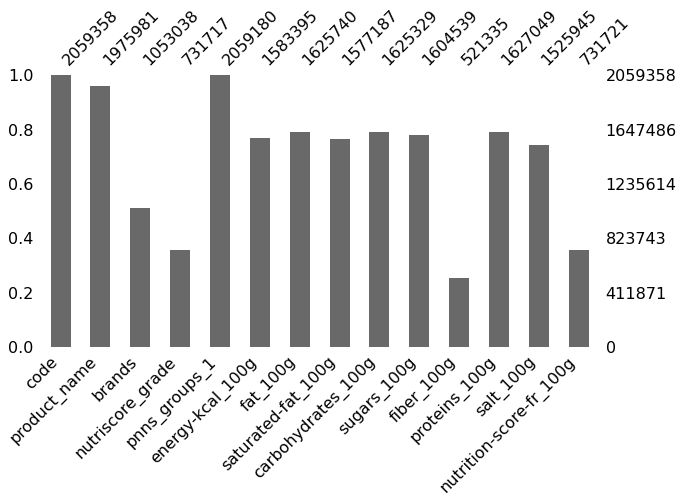

In [7]:
msno.bar(data, figsize=(10,5));

<h2> Let's first clean some obvious outliers
   

In [8]:
non_negative_capped_data = ['fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g']
numeric_data = ['energy-kcal_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','nutrition-score-fr_100g']

In [9]:
data

,code,product_name,brands,nutriscore_grade,pnns_groups_1,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,00000000000000225,jeunes pousses,endives,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000000003429145,L.casei,NaN,NaN,unknown,NaN,1.4,0.90,9.8,9.8,NaN,2.7,0.10,NaN
2,0000000000017,Vitória crackers,NaN,NaN,unknown,375.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,NaN
3,0000000000031,Cacao,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000003327986,Filetes de pollo empanado,NaN,NaN,unknown,163.9,1.9,1.00,NaN,NaN,NaN,15.3,1.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059353,9999999910128,Sandwich club Rillette poisson combava,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2059354,999999999,Thé noir BIO Darjeeling,Pagès,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2059355,9999999990397,Fati,NaN,NaN,unknown,24.0,0.3,0.00,2.4,0.6,NaN,1.6,0.64,NaN
2059356,9999999999994,Light & Free SKYR A BOIRE,NaN,NaN,unknown,0.0,0.2,0.10,8.0,7.8,NaN,5.5,0.15,NaN


In [10]:
min_capper = lambda x : 0 if x < 0 else x

def max_capper_func(df,column,max_value,med):
    df[column] = df[column].apply(lambda x : x if x < max_value else med)
    return df[column]

In [11]:
for col in non_negative_capped_data:
    data[col] = data[col].apply(min_capper)
    med = np.nanmedian(data[col])
    data[col] = max_capper_func(data,col,100,med)
med = np.nanmedian(data['energy-kcal_100g'])
data['energy-kcal_100g'] = max_capper_func(data,'energy-kcal_100g',1000,med)

In [12]:
data

,code,product_name,brands,nutriscore_grade,pnns_groups_1,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,00000000000000225,jeunes pousses,endives,NaN,unknown,260.0,7.0,1.80,15.1,3.57,1.6,6.0,0.58,NaN
1,00000000000003429145,L.casei,NaN,NaN,unknown,260.0,1.4,0.90,9.8,9.80,1.6,2.7,0.10,NaN
2,0000000000017,Vitória crackers,NaN,NaN,unknown,375.0,7.0,3.08,70.1,15.00,1.6,7.8,1.40,NaN
3,0000000000031,Cacao,NaN,NaN,unknown,260.0,7.0,1.80,15.1,3.57,1.6,6.0,0.58,NaN
4,000000000003327986,Filetes de pollo empanado,NaN,NaN,unknown,163.9,1.9,1.00,15.1,3.57,1.6,15.3,1.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059353,9999999910128,Sandwich club Rillette poisson combava,NaN,NaN,unknown,260.0,7.0,1.80,15.1,3.57,1.6,6.0,0.58,NaN
2059354,999999999,Thé noir BIO Darjeeling,Pagès,NaN,unknown,260.0,7.0,1.80,15.1,3.57,1.6,6.0,0.58,NaN
2059355,9999999990397,Fati,NaN,NaN,unknown,24.0,0.3,0.00,2.4,0.60,1.6,1.6,0.64,NaN
2059356,9999999999994,Light & Free SKYR A BOIRE,NaN,NaN,unknown,0.0,0.2,0.10,8.0,7.80,1.6,5.5,0.15,NaN


In [13]:
data.describe()

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,2.059358e+06,2.059358e+06,2.059358e+06,2.059358e+06,2.059358e+06,2.059358e+06,2.059358e+06,2.059358e+06,731721.000000
mean,2.684823e+02,1.186652e+01,4.299644e+00,2.501626e+01,1.079214e+01,1.969454e+00,8.114660e+00,1.129900e+00,9.113681
std,1.685831e+02,1.486564e+01,6.928899e+00,2.500119e+01,1.718764e+01,2.629165e+00,8.867900e+00,3.805790e+00,8.851206
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-15.000000
25%,1.430000e+02,1.700000e+00,4.000000e-01,5.500000e+00,1.100000e+00,1.600000e+00,2.700000e+00,1.500000e-01,1.000000
50%,2.600000e+02,7.000000e+00,1.800000e+00,1.510000e+01,3.570000e+00,1.600000e+00,6.000000e+00,5.800000e-01,10.000000
75%,3.640000e+02,1.600000e+01,4.700000e+00,4.333000e+01,1.071429e+01,1.600000e+00,1.000000e+01,1.035000e+00,16.000000
max,9.998100e+02,9.999000e+01,9.990000e+01,9.999000e+01,9.999000e+01,9.900000e+01,9.990000e+01,9.999500e+01,40.000000


In [14]:
data = data.dropna(how='any',subset=numeric_data)
data = data.reset_index(drop=True)

In [15]:
data

,code,product_name,brands,nutriscore_grade,pnns_groups_1,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000000100,moutarde au moût de raisin,courte paille,d,Fat and sauces,260.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60,18.0
1,0000000000949,Salade de carottes râpées,NaN,b,Composite foods,32.0,0.3,0.1,5.3,3.9,1.6,0.9,0.42,1.0
2,0000000001281,Tarte noix de coco,"Crous Resto',Crous",d,Sugary snacks,381.0,22.0,15.5,27.3,21.9,4.4,4.6,0.10,14.0
3,0000000001885,Compote de poire,Crous,a,Fruits and vegetables,157.0,0.0,0.0,36.0,27.0,3.6,0.6,0.00,-2.0
4,0000000002257,Salade de macedoine de légumes,NaN,b,Composite foods,143.0,12.7,1.0,3.9,1.0,1.6,1.9,0.27,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731716,9999991042742,Mousse au chocolat noir,NaN,d,unknown,346.0,27.0,17.0,19.0,18.0,1.6,6.0,0.19,17.0
731717,9999991149090,Riz parfumé,King Elephant,b,Cereals and potatoes,351.0,0.5,0.0,80.0,0.0,1.6,7.0,0.00,0.0
731718,9999999004360,Minis beignets,NaN,d,unknown,333.0,20.2,6.0,30.9,10.4,1.6,7.4,1.10,15.0
731719,9999999175305,Erdbeerkuchen 1019g tiefgefroren,Coppenrath & Wiese,d,Sugary snacks,260.0,7.6,4.8,35.0,24.0,1.6,2.6,0.28,12.0


In [16]:
#temp_data = data.sample(n=10000,random_state = 42).reset_index(drop=True)
#temp_data

In [17]:
def grader_food(x):
        if x<=-1:
            return 'a'
        elif (x>-1)&(x<=2):
            return 'b'
        elif (x>2)&(x<=10):
            return 'c'
        elif (x>10)&(x<=18):
            return 'd'
        else:
            return 'e'

def grader_beverages(x):
        if (x<=0):
            return 'a'
        elif (x>0)&(x<=1):
            return 'b'
        elif (x>1)&(x<=5):
            return 'c'
        elif (x>5)&(x<=9):
            return 'd'
        else:
            return 'e'

In [18]:
for ind in range(len(data.index)):
    if data['nutriscore_grade'].loc[ind] is np.nan:
        if data['pnns_groups_1'].loc[ind] == 'Beverages':
            data['nutriscore_grade'].loc[ind] = grader_beverages(data['nutrition-score-fr_100g'].loc[ind])
        else:
            data['nutriscore_grade'].loc[ind] = grader_food(data['nutrition-score-fr_100g'].loc[ind])

/Users/efkanturedi/opt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
data

,code,product_name,brands,nutriscore_grade,pnns_groups_1,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000000100,moutarde au moût de raisin,courte paille,d,Fat and sauces,260.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60,18.0
1,0000000000949,Salade de carottes râpées,NaN,b,Composite foods,32.0,0.3,0.1,5.3,3.9,1.6,0.9,0.42,1.0
2,0000000001281,Tarte noix de coco,"Crous Resto',Crous",d,Sugary snacks,381.0,22.0,15.5,27.3,21.9,4.4,4.6,0.10,14.0
3,0000000001885,Compote de poire,Crous,a,Fruits and vegetables,157.0,0.0,0.0,36.0,27.0,3.6,0.6,0.00,-2.0
4,0000000002257,Salade de macedoine de légumes,NaN,b,Composite foods,143.0,12.7,1.0,3.9,1.0,1.6,1.9,0.27,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731716,9999991042742,Mousse au chocolat noir,NaN,d,unknown,346.0,27.0,17.0,19.0,18.0,1.6,6.0,0.19,17.0
731717,9999991149090,Riz parfumé,King Elephant,b,Cereals and potatoes,351.0,0.5,0.0,80.0,0.0,1.6,7.0,0.00,0.0
731718,9999999004360,Minis beignets,NaN,d,unknown,333.0,20.2,6.0,30.9,10.4,1.6,7.4,1.10,15.0
731719,9999999175305,Erdbeerkuchen 1019g tiefgefroren,Coppenrath & Wiese,d,Sugary snacks,260.0,7.6,4.8,35.0,24.0,1.6,2.6,0.28,12.0


In [20]:
final_path = '/Users/efkanturedi/Corteze/untitled folder/nutri_clean_prod.csv'

In [21]:
data.to_csv(final_path, index=False)